In [2]:
%cd ..
import app as app

C:\Users\cgor\Documents\GitHub\Ideal_Cat_Profile


C:\Users\cgor\Anaconda3\envs\Ideal_Cat_Profile\lib\site-packages\tensorflow\python\framework\dtypes.py:493: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\cgor\Anaconda3\envs\Ideal_Cat_Profile\lib\site-packages\tensorflow\python\framework\dtypes.py:494: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\cgor\Anaconda3\envs\Ideal_Cat_Profile\lib\site-packages\tensorflow\python\framework\dtypes.py:495: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\cgor\Anaconda3\envs\Ideal_Cat_P

(500, 500, 3)
(403, 500, 3)
(417, 500, 3)
(499, 500, 3)
(594, 515, 3)
(347, 500, 3)
(582, 500, 3)
(598, 500, 3)
(542, 500, 3)
(333, 500, 3)
(666, 500, 3)
(333, 500, 3)
(358, 500, 3)
(333, 500, 3)
(486, 500, 3)
(333, 500, 3)
(380, 500, 3)
(752, 500, 3)
(426, 500, 3)
(402, 500, 3)
(333, 500, 3)
(281, 500, 3)
(752, 500, 3)
(529, 500, 3)
(604, 500, 3)
(333, 500, 3)
(375, 500, 3)
(666, 500, 3)
(333, 500, 3)
(333, 500, 3)
(333, 500, 3)
(666, 500, 3)
(350, 500, 3)
(333, 500, 3)
(748, 500, 3)
(426, 500, 3)
(666, 500, 3)
(666, 500, 3)
(375, 500, 3)
(518, 500, 3)
(704, 500, 3)
(330, 500, 3)
(333, 500, 3)
(333, 500, 3)
(500, 500, 3)
(524, 500, 3)
(281, 500, 3)
(400, 600, 3)
(0.8894636519818693, 0.0)
(-0.9484154821721213, 0.0)
(0.8841856501136868, 1.7993329265217926e-107)
(0.3367311921115993, 3.403967741407729e-53)
(-0.8087700034345069, 8.508103263887168e-60)
(0.9767053251452702, 0.0)
(0.9709766800345732, 0.0)
(0.8531791431072572, 0.0)
(0.9253706624302975, 8e-323)
(0.9319152397539274, 0.0)
(0.8979

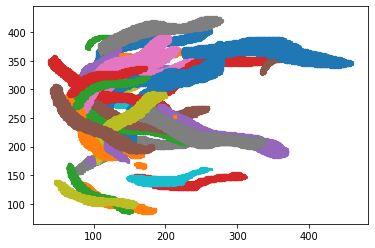

In [3]:
images = app.generate()

In [ ]:
nt = []
for image in images:
    if image is not None:
        tx = []
        ty = []

        for x,y in image.curve:
            tx.append(x)
            ty.append(y)
        prs = pearsonr(tx, ty)
        print(prs)
        
        if abs(prs[0] - prs[1]) < 8.5e-1:
            nt.append(0)
        else:
            nt.append(1)

print(nt)

In [ ]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

from matplotlib import pyplot as plt
for image in images:
    if image is not None:
        x=[]
        y=[]
        for p in image.curve:
            coords = p.tolist()
            x.append(coords[0])
            y.append(coords[1])
        
            
        plt.scatter(x, y)
        plt.show()
        from scipy.stats import linregress, pearsonr
        result = linregress(x, y)
        r2 =  pearsonr(x,y)
        from decimal import Decimal
        if abs(r2[0] - r2[1]) < 8.5e-1:
            print("class 1")
        else:
            print("class 0")
        print(abs(r2[0] - r2[1]))
            

In [ ]:
def norm(profile):
    if np.unique(profile).shape[0] == 1:
        pass  # do thing if the input_array is constant
    else:
        result_array = (profile - np.min(profile)) / np.ptp(profile)
        return result_array

coefs = []
for image in images:
    if image is not None:
        for coef in image.coef:
            coefs.append(norm(coef))

d =np.asarray(coefs)
print(d)
np.savetxt('tesssst.txt', d)

In [ ]:
%matplotlib inline
from src.profile_classifier.svm import fit_svm
fit_svm(d)